# Import

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
path1 = "/content/drive/MyDrive/ImageProcessing/Finding/find1/"
path2 = "/content/drive/MyDrive/ImageProcessing/Finding/find2/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def create_mask(template):
    gray_template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    _, mask = cv2.threshold(gray_template, 200, 255, cv2.THRESH_BINARY_INV)
    return mask

# Task 1

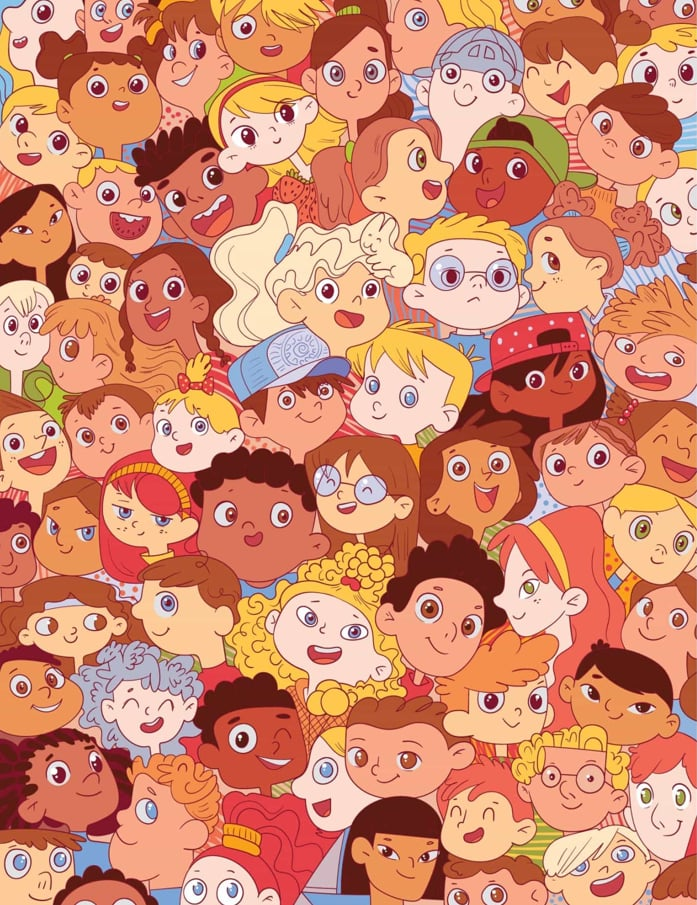

In [ ]:
image_1 = cv2.imread(os.path.join(path1, "1.jpg"))
cv2_imshow(image_1)
image_gray = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
result_1 = image_1.copy()

In [ ]:
objects_1 = []
for filename in os.listdir(os.path.join(path1, 'objects')):
  objects_1.append(os.path.join(path1, 'objects', filename))

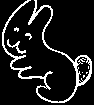

In [ ]:
test = create_mask(cv2.imread(objects_1[2]))
cv2_imshow(test)

In [ ]:
scales = np.linspace(0.5, 1, 10)

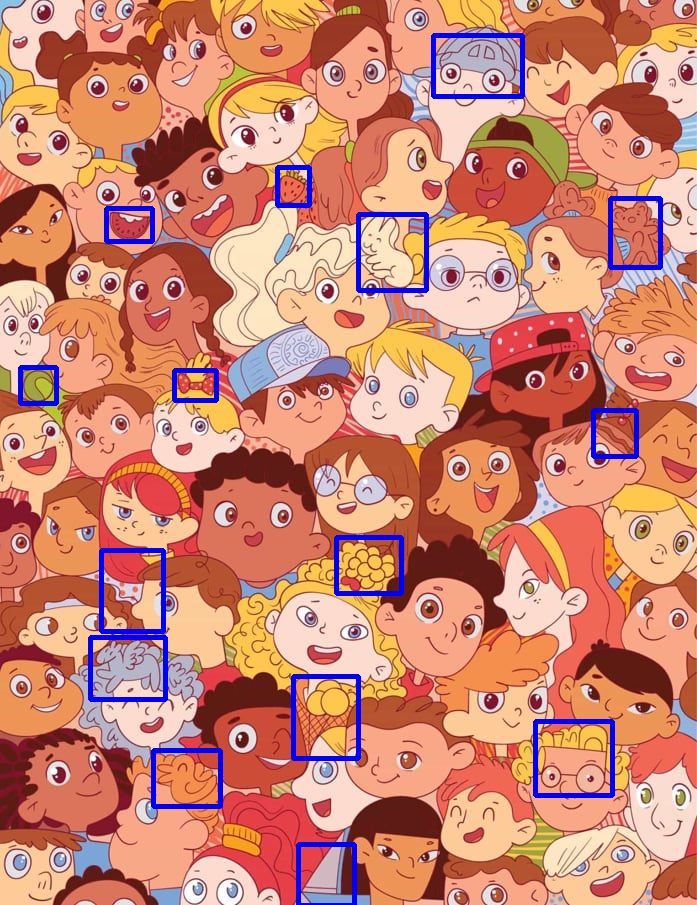

In [ ]:
for object_path in objects_1:
    template = cv2.imread(object_path)
    mask = create_mask(template)

    max_val_global = -1
    best_match_loc = None
    best_scale = None
    best_w, best_h = None, None

    for scale in scales:
        resized_template = cv2.resize(template, (0, 0), fx=scale, fy=scale)
        resized_mask = cv2.resize(mask, (resized_template.shape[1], resized_template.shape[0]))

        w, h = resized_template.shape[1], resized_template.shape[0]
        result = cv2.matchTemplate(image_1, resized_template, cv2.TM_CCOEFF_NORMED, mask=resized_mask)

        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val > max_val_global:
            max_val_global = max_val
            best_match_loc = max_loc
            best_scale = scale
            best_w, best_h = w, h

    if best_match_loc is not None:
        top_left = best_match_loc
        bottom_right = (top_left[0] + best_w, top_left[1] + best_h)
        cv2.rectangle(result_1, top_left, bottom_right, (255, 0, 0), 4)

cv2_imshow(result_1)

# Task 2

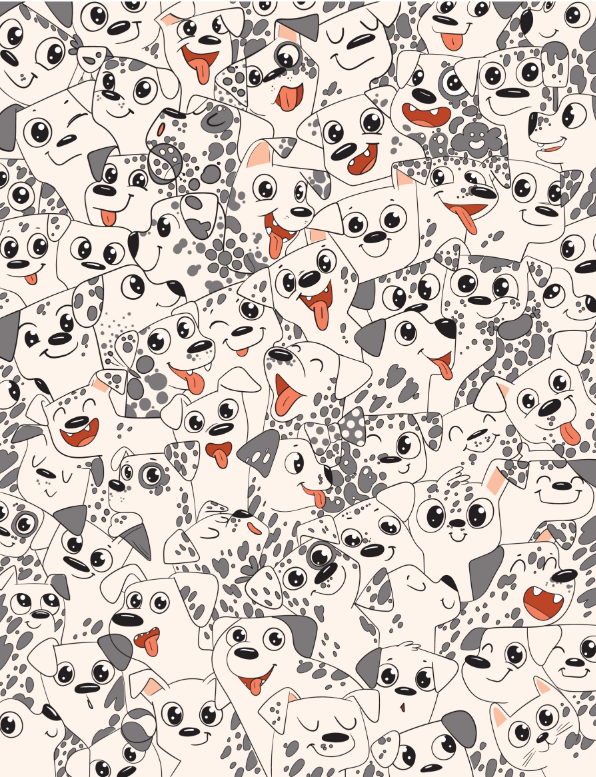

In [ ]:
image_2 = cv2.imread(os.path.join(path2, "2.png"))
cv2_imshow(image_2)
image_gray = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
result_2 = image_2.copy()

In [ ]:
objects_2 = []
for filename in os.listdir(os.path.join(path2, 'objects')):
  objects_2.append(os.path.join(path2, 'objects', filename))

In [ ]:
scales = np.linspace(0.5, 1, 10)

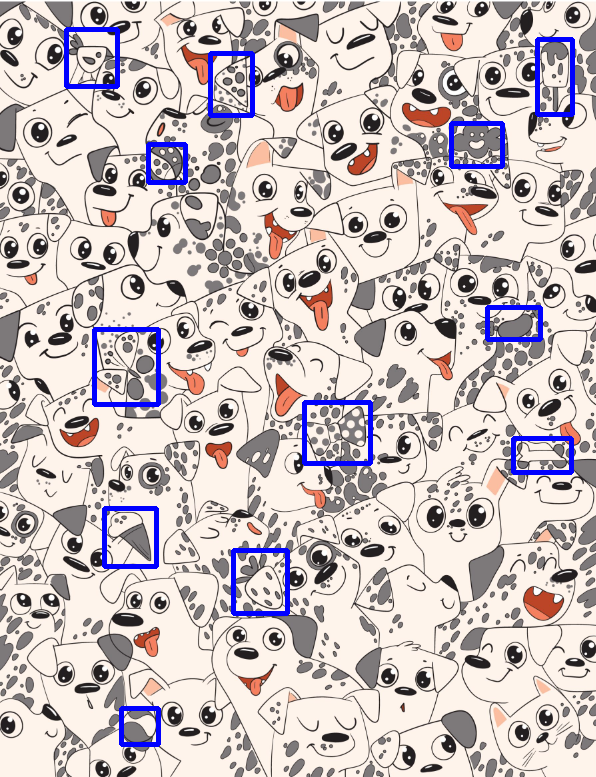

In [123]:
for object_path in objects_2:
    template = cv2.imread(object_path)

    max_val_global = -1
    best_match_loc = None
    best_scale = None
    best_w, best_h = None, None

    for scale in scales:
        resized_template = cv2.resize(template, (0, 0), fx=scale, fy=scale)

        w, h = resized_template.shape[1], resized_template.shape[0]

        if w > image_2.shape[1] or h > image_2.shape[0]:
            continue

        result = cv2.matchTemplate(image_2, resized_template, cv2.TM_CCOEFF_NORMED)

        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

        if max_val > max_val_global:
            max_val_global = max_val
            best_match_loc = max_loc
            best_scale = scale
            best_w, best_h = w, h

    if best_match_loc is not None:
        top_left = best_match_loc
        bottom_right = (top_left[0] + best_w, top_left[1] + best_h)
        cv2.rectangle(result_2, top_left, bottom_right, (255, 0, 0), 4)

cv2_imshow(result_2)